In [1]:
import cv2
import math
import matplotlib.pyplot as plt
import torch
from collections import OrderedDict
import torch.nn.functional as F
import dlib
from Architecture  import anti_spoofing
import time
from PIL import Image
import face_recognition
import numpy as np

In [29]:
start = time.time()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = anti_spoofing().to(device)
weights_path = 'model.pth'
state_dict = torch.load(weights_path, map_location = torch.device('cpu'))
new_state_dict = OrderedDict()
for key, value in state_dict.items():
    name_key = key[7:]
    new_state_dict[name_key] = value
model.load_state_dict(new_state_dict)
model.eval()
#########################################################


known_persons = [("elsoudy", "image/ter.jpg"),
                 ("bassem", "image/1.jpg")]
    

    
known_face_encodings = []
known_face_names = []
for name, image_path in known_persons:
    known_image = face_recognition.load_image_file(image_path)
    face_encoding = face_recognition.face_encodings(known_image)[0]
    known_face_encodings.append(face_encoding)
    known_face_names.append(name)
##########################################


img = cv2.imread('image/ter.jpg')

detector = dlib.get_frontal_face_detector()
faces = detector(img)

for face in faces:
    x, y, width, height = face.left(), face.top(), face.width(), face.height()
h, w, c = np.shape(img)


scale = min((h-1)/height, min((w-1)/width, 2.7))

new_width = width * scale
new_height = height * scale
center_x, center_y = width/2+x, height/2+y

left_top_x = max(center_x-new_width/2, 0)
left_top_y = max(center_y-new_height/2, 0)
right_bottom_x = min(center_x+new_width/2, w-1)
right_bottom_y = min(center_y+new_height/2, h-1)


image = img[int(left_top_y): int(right_bottom_y)+1,
                          int(left_top_x): int(right_bottom_x)+1]


image = cv2.resize(image, (80, 80))
#########################################################


image = torch.from_numpy(image.transpose((2, 0, 1))).float()
image = image.unsqueeze(0).to(torch.device('cpu'))

with torch.no_grad():
    output = model.forward(image)
    result = F.softmax(output, dim=-1).cpu().numpy()



label = np.argmax(result)
value = result[0][label]

####################################################


face_locations = face_recognition.face_locations(img)
if label == 1:
    print("Image is Real Face. Score: {:.2f}".format(value))
    result_text = "RealFace Score: {:.2f}".format(value)
    color = (255, 0, 0)
        
    if len(face_locations) > 0:
        face_encodings = face_recognition.face_encodings(img, face_locations)

        for face_encoding in face_encodings:
                # Compare the current face encoding with known face encodings
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

            name = "Unknown"

            for i, match in enumerate(matches):
                if match:
                    name = known_face_names[i]
                    break

            print(f"Recognized: {name}")
        
    for (top, right, bottom, left) in face_locations:
        cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
        cv2.putText(img, f'{name}, {result_text}' , (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
        
else:
    print("Image is Fake Face. Score: {:.2f}".format(value))
    result_text = "FakeFace Score: {:.2f}".format(value)
    color = (0, 0, 255)
    for (top, right, bottom, left) in face_locations:
        cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
        cv2.putText(img, result_text, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
end = time.time()
print(end - start)


torch.Size([1, 512])
Image is Real Face. Score: 1.00
Recognized: elsoudy
3.0524442195892334


In [ ]:
##codeV1.2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = anti_spoofing().to(device)
weights_path = 'model.pth'
state_dict = torch.load(weights_path, map_location = torch.device('cpu'))
new_state_dict = OrderedDict()
for key, value in state_dict.items():
    name_key = key[7:]
    new_state_dict[name_key] = value
model.load_state_dict(new_state_dict)
model.eval()
#############################################


known_persons = [("elsoudy", "image/ter.jpg"),
                 ("bassem", "image/1.jpg")]
    

    
known_face_encodings = []
known_face_names = []
for name, image_path in known_persons:
    known_image = face_recognition.load_image_file(image_path)
    face_encoding = face_recognition.face_encodings(known_image)[0]
    known_face_encodings.append(face_encoding)
    known_face_names.append(name)
##########################################
##########################################


img = cv2.imread('image/ter.jpg')

detector = dlib.get_frontal_face_detector()
faces = detector(img)

for face in faces:
    x, y, width, height = face.left(), face.top(), face.width(), face.height()
    h, w, c = np.shape(img)


scale = min((h-1)/height, min((w-1)/width, 2.7))

new_width = width * scale
new_height = height * scale
center_x, center_y = width/2+x, height/2+y

left_top_x = max(center_x-new_width/2, 0)
left_top_y = max(center_y-new_height/2, 0)
right_bottom_x = min(center_x+new_width/2, w-1)
right_bottom_y = min(center_y+new_height/2, h-1)


image = img[int(left_top_y): int(right_bottom_y)+1,
                          int(left_top_x): int(right_bottom_x)+1]


image = cv2.resize(image, (80, 80))



############################################################
image = torch.from_numpy(image.transpose((2, 0, 1))).float()
image = image.unsqueeze(0).to(torch.device('cpu'))
start = time.time()
with torch.no_grad():
    output = model.forward(image)
    result = F.softmax(output, dim=-1).cpu().numpy()
end = time.time()


label = np.argmax(result)
value = result[0][label]


####################################################
####################################################


face_locations = face_recognition.face_locations(img)
if label == 1:
    print("Image is Real Face. Score: {:.2f}".format(value))
    result_text = "RealFace Score: {:.2f}".format(value)
    color = (255, 0, 0)
        
    if len(face_locations) > 0:
        face_image = img[y:y+height, x:x+width]
        face_encodings = face_recognition.face_encodings(face_image)

        for face_encoding in face_encodings:
                # Compare the current face encoding with known face encodings
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

            name = "Unknown"

            for i, match in enumerate(matches):
                if match:
                    name = known_face_names[i]
                    break

            print(f"Recognized: {name}")
        
    for (top, right, bottom, left) in face_locations:
        cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
        cv2.putText(img, f'{name}, {result_text}' , (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
        
else:
    print("Image is Fake Face. Score: {:.2f}".format(value))
    result_text = "FakeFace Score: {:.2f}".format(value)
    color = (0, 0, 255)
    for (top, right, bottom, left) in face_locations:
        cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
        cv2.putText(img, result_text, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
print(end - start)






In [15]:
##codeV1.3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = anti_spoofing().to(device)
weights_path = 'model.pth'
state_dict = torch.load(weights_path, map_location = torch.device('cpu'))
new_state_dict = OrderedDict()
for key, value in state_dict.items():
    name_key = key[7:]
    new_state_dict[name_key] = value
model.load_state_dict(new_state_dict)
model.eval()
#############################################


known_persons = [("elsoudy", "image/ter.jpg"),
                 ("bassem", "image/1.jpg")]
    

    
known_face_encodings = []
known_face_names = []
for name, image_path in known_persons:
    known_image = face_recognition.load_image_file(image_path)
    face_encoding = face_recognition.face_encodings(known_image)[0]
    known_face_encodings.append(face_encoding)
    known_face_names.append(name)
##########################################
##########################################


img = cv2.imread('image/ter.jpg')

face_locations = face_recognition.face_locations(img)

for face in face_locations:
    x, y, width, height = (face[3], face[0], face[1], face[2])
    h, w, c = np.shape(img)


    scale = min((h-1)/height, min((w-1)/width, 2.7))

    new_width = width * scale
    new_height = height * scale
    center_x, center_y = width/2+x, height/2+y

    left_top_x = max(center_x-new_width/2, 0)
    left_top_y = max(center_y-new_height/2, 0)
    right_bottom_x = min(center_x+new_width/2, w-1)
    right_bottom_y = min(center_y+new_height/2, h-1)


    image = img[int(left_top_y): int(right_bottom_y)+1,
                              int(left_top_x): int(right_bottom_x)+1]


    image = cv2.resize(image, (80, 80))



############################################################
############################################################
    image = torch.from_numpy(image.transpose((2, 0, 1))).float()
    image = image.unsqueeze(0).to(torch.device('cpu'))
    start = time.time()
    with torch.no_grad():
        output = model.forward(image)
        result = F.softmax(output, dim=-1).cpu().numpy()
    end = time.time()


    label = np.argmax(result)
    value = result[0][label]


####################################################

    if label == 1:
        print("Image is Real Face. Score: {:.2f}".format(value))
        result_text = "RealFace Score: {:.2f}".format(value)
        color = (255, 0, 0)

        if len(face_locations) > 0:
            face_encodings = face_recognition.face_encodings(img, face_locations)

            for face_encoding in face_encodings:
                    # Compare the current face encoding with known face encodings
                matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

                name = "Unknown"

                for i, match in enumerate(matches):
                    if match:
                        name = known_face_names[i]
                        break

                print(f"Recognized: {name}")

        for (top, right, bottom, left) in face_locations:
            cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.putText(img, f'{name}, {result_text}' , (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    else:
        print("Image is Fake Face. Score: {:.2f}".format(value))
        result_text = "FakeFace Score: {:.2f}".format(value)
        color = (0, 0, 255)
        for (top, right, bottom, left) in face_locations:
            cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.putText(img, result_text, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    print(end - start)






torch.Size([1, 512])
Image is Real Face. Score: 1.00
Recognized: elsoudy
0.007998228073120117


In [44]:
def create_model():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = anti_spoofing().to(device)
    weights_path = 'model.pth'
    state_dict = torch.load(weights_path, map_location = torch.device('cpu'))
    new_state_dict = OrderedDict()
    for key, value in state_dict.items():
        name_key = key[7:]
        new_state_dict[name_key] = value
    model.load_state_dict(new_state_dict)
    model.eval()
    return model

In [52]:
def known_persons():
    known_persons = [("bassem", "image/1.jpg"),("elsoudy", "image/ter.jpg")]
                     

    known_face_encodings = []
    known_face_names = []
    for name, image_path in known_persons:
        known_image = face_recognition.load_image_file(image_path)
        face_encoding = face_recognition.face_encodings(known_image)[0]
        known_face_encodings.append(face_encoding)
        known_face_names.append(name)
    return known_face_encodings, known_face_names

In [53]:
def load_img(path):
    img = cv2.imread(path)
    return img


In [54]:
def face_pre(face, img,s = 2.7):

    x, y, width, height = (face[3], face[0], face[1], face[2])
    h, w, c = np.shape(img)


    scale = min((h-1)/height, min((w-1)/width, s))

    new_width = width * scale
    new_height = height * scale
    center_x, center_y = width/2+x, height/2+y

    left_top_x = max(center_x-new_width/2, 0)
    left_top_y = max(center_y-new_height/2, 0)
    right_bottom_x = min(center_x+new_width/2, w-1)
    right_bottom_y = min(center_y+new_height/2, h-1)


    image = img[int(left_top_y): int(right_bottom_y)+1,
                              int(left_top_x): int(right_bottom_x)+1]


    image = cv2.resize(image, (80, 80))
    return image, x, y, width, height

In [55]:
def check_spoof(model, image):
    image = torch.from_numpy(image.transpose((2, 0, 1))).float()
    image = image.unsqueeze(0).to(torch.device('cpu'))
    with torch.no_grad():
        output = model.forward(image)
        result = F.softmax(output, dim=-1).cpu().numpy()
    label = np.argmax(result)
    value = result[0][label]    
    return label, value

In [56]:
def face_recog(known_face_encodings, known_face_names, img, face):
    face_encodings = face_recognition.face_encodings(img, [face])

    for face_encoding in face_encodings:
        # Compare the current face encoding with known face encodings
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

        name = "Unknown"

        for i, match in enumerate(matches):
            if match:
                name = known_face_names[i]
                break
    return name

In [100]:
def main(path):
    start = time.time()
    model = create_model()
    known_face_encodings, known_face_names = known_persons()
    img = load_img(path)
    face_locations = face_recognition.face_locations(img)
    for face in face_locations:
        
        image, x, y, width, height = face_pre(face, img)
        label, value = check_spoof(model, image)
        factor_font = int(width/10)
        if label == 1:
            print(f"Image is Real Face. Score: {value}")
            result_text = "RealFace Score: {:.2f}".format(value)
            color = (255, 0, 255)
            name = face_recog(known_face_encodings, known_face_names, img, face)
            print(f'Recognized: {name}, {result_text}')
            
            top, right, bottom, left = face
            cv2.rectangle(img,(left,top),(right,bottom), color,2)
            cv2.putText(img,f"{name}, {result_text}", ((left-20,top-10)), cv2.FONT_HERSHEY_SIMPLEX, 
                        0.025*factor_font,(0,255,255), int(0.1*factor_font))
            
            
        else:
            
            print(f"Image is Fake Face. Score: {value}")
            result_text = "FakeFace Score: {:.2f}".format(value)
            color = (255, 0, 0)
            
            top, right, bottom, left = face
            cv2.rectangle(img, (left, top), (right, bottom), color, 2)
            
            cv2.putText(img, result_text, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.025*factor_font, color, int(0.1*factor_font))
            
        end = time.time()    
        print(end - start)
        plt.imshow(img)
            
            
        

        
    

torch.Size([1, 512])
Image is Real Face. Score: 0.9999620914459229
Recognized: elsoudy, RealFace Score: 1.00
2.600292682647705


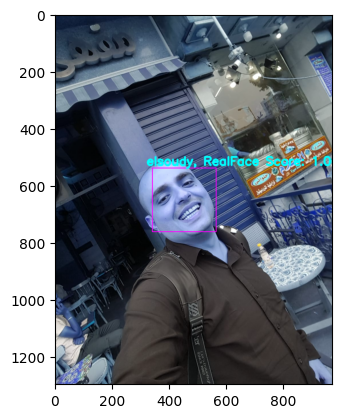

In [101]:
main('image/ter.jpg')

torch.Size([1, 512])
Image is Real Face. Score: 0.9999620914459229
Recognized: Unknown, RealFace Score: 1.00
1.6257448196411133


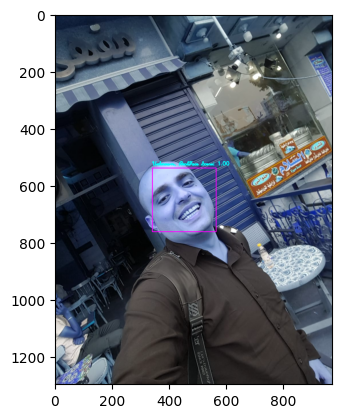

In [29]:
path = ('image/ter.jpg')
start = time.time()
model = create_model()
known_face_encodings, known_face_names = known_persons()
img = load_img(path)
face_locations = face_recognition.face_locations(img)
for face in face_locations:
        
    image, x, y, width, height = face_pre(face, img)
    label, value = check_spoof(model, image)
    if label == 1:
        print(f"Image is Real Face. Score: {value}")
        result_text = "RealFace Score: {:.2f}".format(value)
        color = (255, 0, 255)
        name = face_recog(known_face_encodings, known_face_names, img, face)
        print(f'Recognized: {name}, {result_text}')
        
        top, right, bottom, left = face
        cv2.rectangle(img,(left,top),(right,bottom), color,2)
        cv2.putText(img,f"{name}, {result_text}", (left,top-10), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,0.6,(0,255,255),2)
            
        
    else:
        print("Image is Fake Face. Score: {:.2f}".format(value))
        result_text = "FakeFace Score: {:.2f}".format(value)
        color = (255, 0, 0)
        
        top, right, bottom, left = face
        cv2.rectangle(img, (left, top), (right, bottom), color, 2)
        cv2.putText(img, result_text, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
            
    end = time.time()    
    print(end - start)
    plt.imshow(img)